<a href="https://colab.research.google.com/github/aynara-codes/Telecom_X_Challenge_2/blob/main/TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Challenge Telecom X**

### Diccionario

------------------

* customerID: número de identificación único de cada cliente
* Churn: si el cliente dejó o no la empresa
* gender: género (masculino y femenino)
* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
* tenure: meses de contrato del cliente
* PhoneService: suscripción al servicio telefónico
* MultipleLines: suscripción a más de una línea telefónica
* InternetService: suscripción a un proveedor de internet
* OnlineSecurity: suscripción adicional de seguridad en línea
* OnlineBackup: suscripción adicional de respaldo en línea
* DeviceProtection: suscripción adicional de protección del dispositivo
* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
* StreamingTV: suscripción de televisión por cable
* StreamingMovies: suscripción de streaming de películas
* Contract: tipo de contrato
* PaperlessBilling: si el cliente prefiere recibir la factura en línea
* PaymentMethod: forma de pago
* Charges.Monthly: total de todos los servicios del cliente por mes
* Charges.Total: total gastado por el cliente

##📌 Extracción

In [ ]:
import pandas as pd

In [ ]:
archivo = "/content/TelecomX_Data.json"

In [ ]:
datos = pd.read_json(archivo)
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#### Normalizacion de los datos anidados

In [ ]:
data_customer = pd.json_normalize(datos['customer'])
data_customer.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure'], dtype='object')

In [ ]:
data_phone = pd.json_normalize(datos['phone'])
data_customer.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure'], dtype='object')

In [ ]:
data_internet = pd.json_normalize(datos['internet'])
data_customer.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure'], dtype='object')

In [ ]:
data_account = pd.json_normalize(datos['account'])
data_customer.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure'], dtype='object')

In [ ]:
datos_telecom = datos[['customerID', 'Churn']].copy()

datos_telecom = datos_telecom.merge(data_customer, left_index=True, right_index=True)

datos_telecom = datos_telecom.merge(data_phone, left_index=True, right_index=True)

datos_telecom = datos_telecom.merge(data_internet, left_index=True, right_index=True)

datos_telecom = datos_telecom.merge(data_account, left_index=True, right_index=True)


display(datos_telecom.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


None

## 🔧 Transformación

#### Conociendo el conjunto de datos

In [ ]:
datos_telecom.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [ ]:
datos_telecom.shape

(7267, 21)

In [ ]:
datos_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#### Comprobando incoherencias

In [ ]:
def comprobar_incoherencias(datos):
  for columna in datos.columns:
    valores_unicos = datos[columna].unique()
    print(f"Valores únicos en la columna '{columna}':")
    print(valores_unicos)
    print()

In [ ]:
comprobar_incoherencias(datos_telecom)

Valores únicos en la columna 'customerID':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores únicos en la columna 'Churn':
['No' 'Yes' '']

Valores únicos en la columna 'gender':
['Female' 'Male']

Valores únicos en la columna 'SeniorCitizen':
[0 1]

Valores únicos en la columna 'Partner':
['Yes' 'No']

Valores únicos en la columna 'Dependents':
['Yes' 'No']

Valores únicos en la columna 'tenure':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Valores únicos en la columna 'PhoneService':
['Yes' 'No']

Valores únicos en la columna 'MultipleLines':
['No' 'Yes' 'No phone service']

Valores únicos en la columna 'InternetService':
['DSL' 'Fiber optic' 'No']

Valores únicos en la columna 'OnlineSecurity':
['No' 'Yes' 'No internet service']

Valores únicos en la columna 'Onl

In [ ]:
# en churn ademas de "Yes" y "No" tenemos otro valor unico que esta vacio
# asi que vamos a ver cuantos estan asi

datos_telecom['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [ ]:
# vemos cuanto equivalen esos datos vacios, en caso de ser menos del 5% del
# total
datos_churn = (datos_telecom['Churn'].value_counts() / len(datos_telecom)) * 100
datos_churn

,count
Churn,
No,71.198569
Yes,25.719004
,3.082427


In [ ]:
# comprobamos si hay nulos

def comprobar_nulos(datos):
  for columna in datos.columns:
    valores_nulos = datos[columna].isnull().sum()
    print(f"Valores nulos en la columna '{columna}':")
    print(valores_nulos)
    print()

In [ ]:
comprobar_nulos(datos_telecom)

Valores nulos en la columna 'customerID':
0

Valores nulos en la columna 'Churn':
0

Valores nulos en la columna 'gender':
0

Valores nulos en la columna 'SeniorCitizen':
0

Valores nulos en la columna 'Partner':
0

Valores nulos en la columna 'Dependents':
0

Valores nulos en la columna 'tenure':
0

Valores nulos en la columna 'PhoneService':
0

Valores nulos en la columna 'MultipleLines':
0

Valores nulos en la columna 'InternetService':
0

Valores nulos en la columna 'OnlineSecurity':
0

Valores nulos en la columna 'OnlineBackup':
0

Valores nulos en la columna 'DeviceProtection':
0

Valores nulos en la columna 'TechSupport':
0

Valores nulos en la columna 'StreamingTV':
0

Valores nulos en la columna 'StreamingMovies':
0

Valores nulos en la columna 'Contract':
0

Valores nulos en la columna 'PaperlessBilling':
0

Valores nulos en la columna 'PaymentMethod':
0

Valores nulos en la columna 'Charges.Monthly':
0

Valores nulos en la columna 'Charges.Total':
0



In [ ]:
# vamos a ver si hay datos duplicados

datos_telecom.duplicated().sum()

np.int64(0)

#### Manejo de inconsistencias

In [ ]:
datos_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
# normalizando

datos_telecom['SeniorCitizen'] = datos_telecom['SeniorCitizen'].replace({1: 'Yes', 0 : 'No'})

In [ ]:
datos_telecom['Charges.Total'] = pd.to_numeric(datos_telecom['Charges.Total'], errors='coerce')

In [ ]:
# decidi que voy a eliminar los que salen vacios ya que conforman el 3.08%
# de los datos totales

In [ ]:
datos_telecom['Churn'] = datos_telecom['Churn'].replace('', 'Nan')

In [ ]:
datos_telecom['Churn'].unique()

array(['No', 'Yes', 'Nan'], dtype=object)

In [ ]:
datos_cleaned = datos_telecom[datos_telecom['Churn'] != 'Nan'].copy()
print("Shape of original data:", datos_telecom.shape)
print("Shape of data after removing 'Nan' churn values:", datos_cleaned.shape)

Shape of original data: (7267, 21)
Shape of data after removing 'Nan' churn values: (7043, 21)


In [ ]:
datos_cleaned['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
datos_telecom = datos_cleaned.copy()

In [ ]:
datos_telecom.shape

(7043, 21)

#### Creacion de columna de cuentas diarias

In [ ]:
datos_telecom.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [ ]:
datos_telecom['Charges.Daily'] = datos_telecom['Charges.Monthly'] / 30
print(datos_telecom[['Charges.Monthly', 'Charges.Daily']].head())

   Charges.Monthly  Charges.Daily
0             65.6       2.186667
1             59.9       1.996667
2             73.9       2.463333
3             98.0       3.266667
4             83.9       2.796667


## 📊 Carga y análisis

#### Analisis descriptivo

In [ ]:
datos_telecom_describe = datos_telecom.describe()
datos_telecom_describe

,tenure,Charges.Monthly,Charges.Total,Charges.Daily
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,2.158723
std,24.559481,30.090047,2266.771362,1.003002
min,0.000000,18.250000,18.800000,0.608333
25%,9.000000,35.500000,401.450000,1.183333
50%,29.000000,70.350000,1397.475000,2.345000
75%,55.000000,89.850000,3794.737500,2.995000
max,72.000000,118.750000,8684.800000,3.958333


#### Distribucion de evasion

In [ ]:
datos_telecom['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
import matplotlib.pyplot as plt

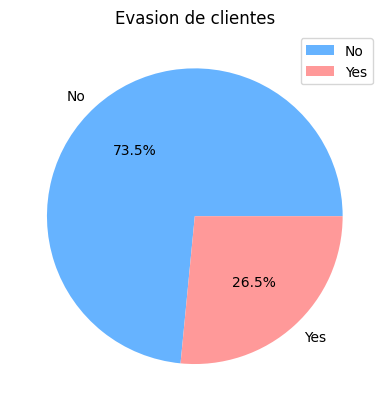

In [ ]:
def pie_evasion(datos_telecom):
 colors = ['#66b3ff', '#ff9999']
 fig, ax = plt.subplots()
 ax.pie(datos_telecom['Churn'].value_counts(), labels=datos_telecom['Churn'].unique(),
       autopct='%1.1f%%', colors=colors)
 ax.set_title('Evasion de clientes')
 ax.set_xlabel('')
 ax.set_ylabel('')
 ax.legend()
 plt.show()

pie_evasion(datos_telecom)

#### Recuento de evasión por variables categóricas

In [ ]:
datos_telecom.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Charges.Daily'],
      dtype='object')

In [ ]:
# Recuentos de datos personales del cliente

print("Recuento de evasión por género:")
display(pd.crosstab(datos_telecom['Churn'], datos_telecom['gender']))

print("\nRecuento de evasión por si es mayor de 65 años:")
display(pd.crosstab(datos_telecom['Churn'], datos_telecom['SeniorCitizen']))

print("\nRecuento de evasión por si tiene pareja:")
display(pd.crosstab(datos_telecom['Churn'], datos_telecom['Partner']))

print("\nRecuento de evasión por si tiene dependientes:")
pd.crosstab(datos_telecom['Churn'], datos_telecom['Dependents'])

Recuento de evasión por género:


gender,Female,Male
Churn,,
No,2549,2625
Yes,939,930



Recuento de evasión por si es mayor de 65 años:


SeniorCitizen,No,Yes
Churn,,
No,4508,666
Yes,1393,476



Recuento de evasión por si tiene pareja:


Partner,No,Yes
Churn,,
No,2441,2733
Yes,1200,669



Recuento de evasión por si tiene dependientes:


Dependents,No,Yes
Churn,,
No,3390,1784
Yes,1543,326


In [ ]:
import seaborn as sns

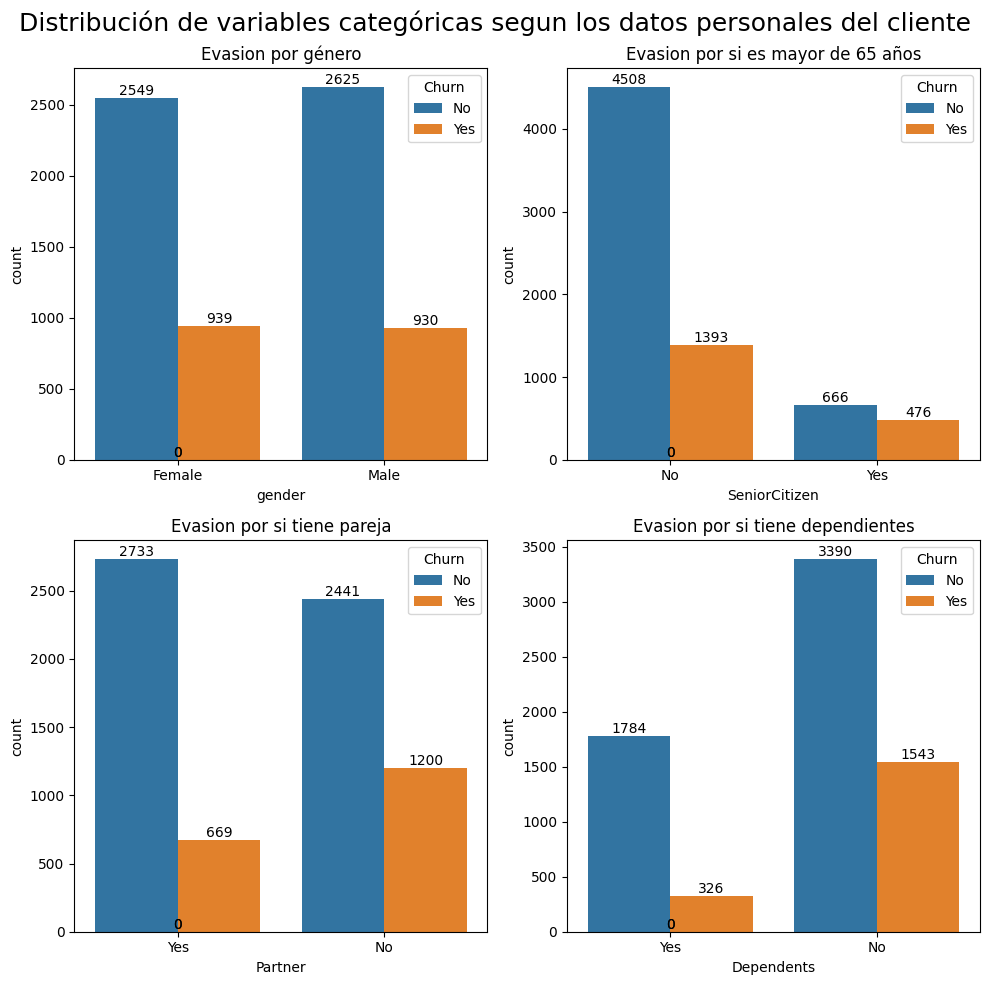

In [ ]:
def distribucion_categorica():
  fig, axs = plt.subplots(2, 2, figsize=(10, 10))
  fig.suptitle('Distribución de variables categóricas segun los datos personales del cliente', fontsize=18)

  sns.countplot(data=datos_telecom, x='gender', hue='Churn', ax=axs[0, 0])
  axs[0, 0].set_title('Evasion por género')

  sns.countplot(data=datos_telecom, x='SeniorCitizen', hue='Churn', ax=axs[0, 1])
  axs[0, 1].set_title('Evasion por si es mayor de 65 años')

  sns.countplot(data=datos_telecom, x='Partner', hue='Churn', ax=axs[1, 0])
  axs[1, 0].set_title('Evasion por si tiene pareja')

  sns.countplot(data=datos_telecom, x='Dependents', hue='Churn', ax=axs[1, 1])
  axs[1, 1].set_title('Evasion por si tiene dependientes')

  for ax in axs.flatten():
      for p in ax.patches:
          ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
                  fontsize=10, color='black', ha='center', va='bottom')

  plt.tight_layout()
  plt.show()

distribucion_categorica()

In [ ]:
# Recuento segun subscripciones del cliente
print('Recuento de evasión por si tiene multiples servicios de linea:')
display(pd.crosstab(datos_telecom['Churn'], datos_telecom['MultipleLines']))

print("\nRecuento de evasión por si tiene servicio de internet:")
display(pd.crosstab(datos_telecom['Churn'], datos_telecom['InternetService']))
print("\nRecuento de evasión por si tiene servicio de telefono:")
display(pd.crosstab(datos_telecom['Churn'], datos_telecom['PhoneService']))

print("\nRecuento de evasión por si tiene soporte tecnico:")
display(pd.crosstab(datos_telecom['Churn'], datos_telecom['TechSupport']))

print("\nRecuento de evasión por si tiene streaming de TV:")
display(pd.crosstab(datos_telecom['Churn'], datos_telecom['StreamingTV']))

print("\nRecuento de evasión por si tiene streaming de peliculas:")
display(pd.crosstab(datos_telecom['Churn'], datos_telecom['StreamingMovies']))

print("\nRecuento de evasión por si tiene respaldo en linea:")
display(pd.crosstab(datos_telecom['Churn'], datos_telecom['OnlineBackup']))

print("\nRecuento de evasión por si tiene seguridad en linea:")
display(pd.crosstab(datos_telecom['Churn'], datos_telecom['OnlineSecurity']))

print("\nRecuento de evasión por si tiene proteccion de dispositivo:")
display(pd.crosstab(datos_telecom['Churn'], datos_telecom['DeviceProtection']))


Recuento de evasión por si tiene multiples servicios de linea:


MultipleLines,No,No phone service,Yes
Churn,,,
No,2541,512,2121
Yes,849,170,850



Recuento de evasión por si tiene servicio de internet:


InternetService,DSL,Fiber optic,No
Churn,,,
No,1962,1799,1413
Yes,459,1297,113



Recuento de evasión por si tiene servicio de telefono:


PhoneService,No,Yes
Churn,,
No,512,4662
Yes,170,1699



Recuento de evasión por si tiene soporte tecnico:


TechSupport,No,No internet service,Yes
Churn,,,
No,2027,1413,1734
Yes,1446,113,310



Recuento de evasión por si tiene streaming de TV:


StreamingTV,No,No internet service,Yes
Churn,,,
No,1868,1413,1893
Yes,942,113,814



Recuento de evasión por si tiene streaming de peliculas:


StreamingMovies,No,No internet service,Yes
Churn,,,
No,1847,1413,1914
Yes,938,113,818



Recuento de evasión por si tiene respaldo en linea:


OnlineBackup,No,No internet service,Yes
Churn,,,
No,1855,1413,1906
Yes,1233,113,523



Recuento de evasión por si tiene seguridad en linea:


OnlineSecurity,No,No internet service,Yes
Churn,,,
No,2037,1413,1724
Yes,1461,113,295



Recuento de evasión por si tiene proteccion de dispositivo:


DeviceProtection,No,No internet service,Yes
Churn,,,
No,1884,1413,1877
Yes,1211,113,545


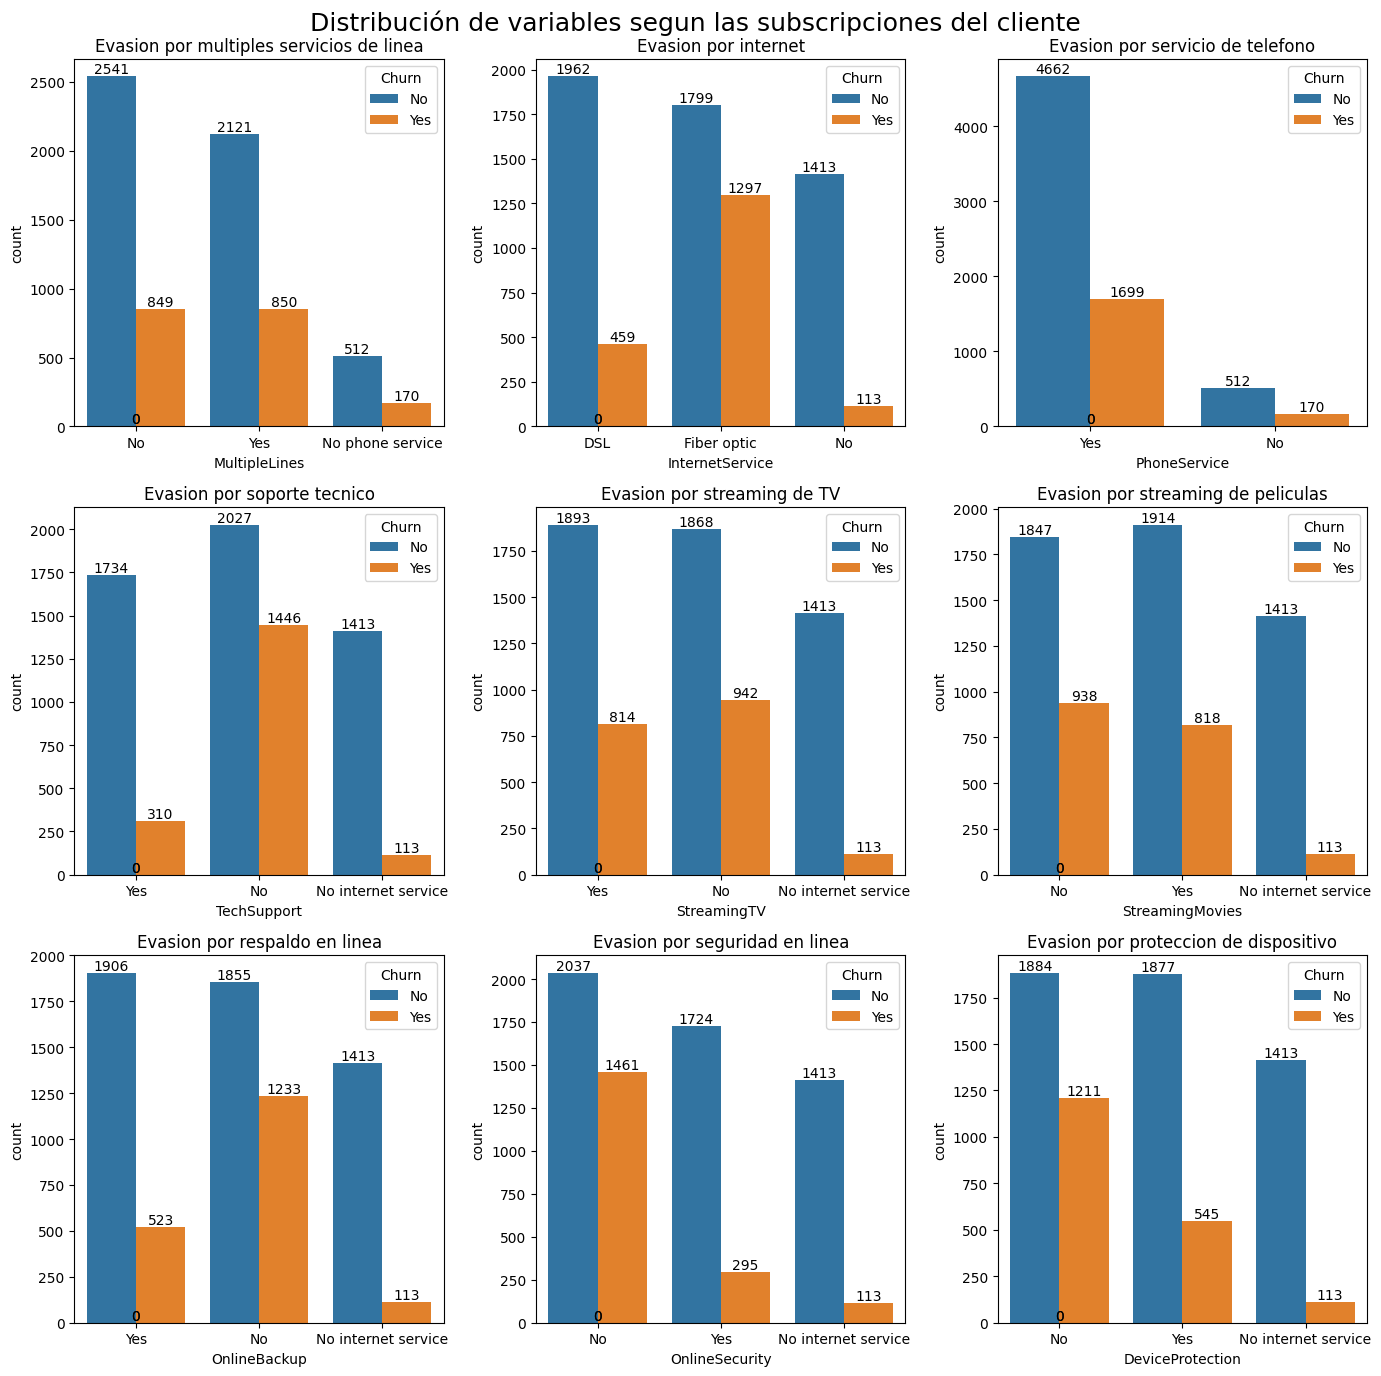

In [ ]:
def distribucion_subscripciones():

  fig,axs = plt.subplots(3,3,figsize=(14,14))

  fig.suptitle('Distribución de variables segun las subscripciones del cliente', fontsize=18)

  sns.countplot(data=datos_telecom, x='MultipleLines', hue='Churn', ax=axs[0,0])
  axs[0,0].set_title('Evasion por multiples servicios de linea')

  sns.countplot(data=datos_telecom, x='InternetService', hue='Churn', ax=axs[0,1])
  axs[0,1].set_title('Evasion por internet')

  sns.countplot(data=datos_telecom, x='PhoneService', hue='Churn', ax=axs[0,2])
  axs[0,2].set_title('Evasion por servicio de telefono') # Added title

  sns.countplot(data=datos_telecom, x='TechSupport', hue='Churn', ax=axs[1,0])
  axs[1,0].set_title('Evasion por soporte tecnico')

  sns.countplot(data=datos_telecom, x='StreamingTV', hue='Churn', ax=axs[1,1])
  axs[1,1].set_title('Evasion por streaming de TV')

  sns.countplot(data=datos_telecom, x='StreamingMovies', hue='Churn', ax=axs[1,2])
  axs[1,2].set_title('Evasion por streaming de peliculas')

  sns.countplot(data=datos_telecom, x='OnlineBackup', hue='Churn', ax=axs[2,0])
  axs[2,0].set_title('Evasion por respaldo en linea')

  sns.countplot(data=datos_telecom, x='OnlineSecurity', hue='Churn', ax=axs[2,1])
  axs[2,1].set_title('Evasion por seguridad en linea')

  sns.countplot(data=datos_telecom, x='DeviceProtection', hue='Churn', ax=axs[2,2])
  axs[2,2].set_title('Evasion por proteccion de dispositivo')


  for ax in axs.flatten():
      for p in ax.patches:
          ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
                  fontsize=10, color='black', ha='center', va='bottom')


  plt.tight_layout()
  plt.show()

distribucion_subscripciones()

In [ ]:
# Recuento segun tipo de pago del cliente

print("\nRecuento de evasión por tipo de contrato:")
display(pd.crosstab(datos_telecom['Churn'], datos_telecom['Contract']))

print("\nRecuento de evasión por forma de pago:")
display(pd.crosstab(datos_telecom['Churn'], datos_telecom['PaymentMethod']))

print("\nRecuento de evasión por si tiene facturacion en linea:")
display(pd.crosstab(datos_telecom['Churn'], datos_telecom['PaperlessBilling']))


Recuento de evasión por tipo de contrato:


Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1307,1647
Yes,1655,166,48



Recuento de evasión por forma de pago:


PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
No,1286,1290,1294,1304
Yes,258,232,1071,308



Recuento de evasión por si tiene facturacion en linea:


PaperlessBilling,No,Yes
Churn,,
No,2403,2771
Yes,469,1400


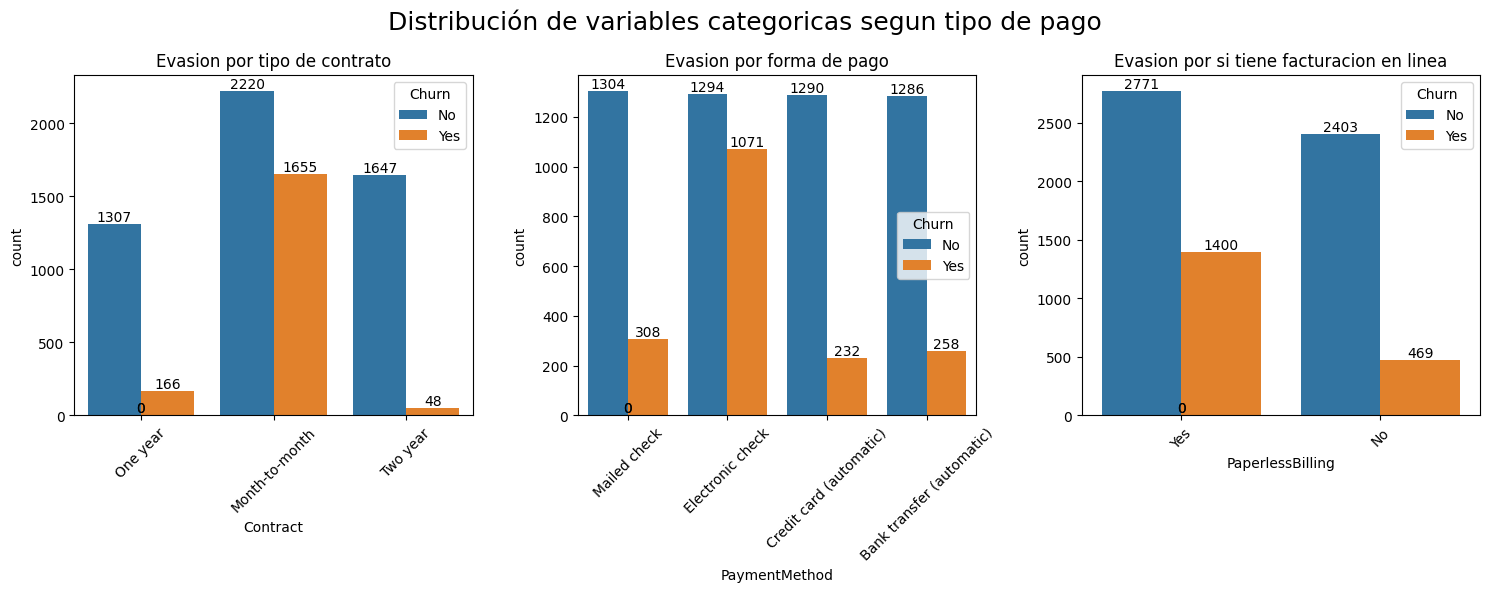

In [ ]:
def distribucion_pagos():

  fig, axs = plt.subplots(1, 3, figsize=(15, 6))
  fig.suptitle('Distribución de variables categoricas segun tipo de pago', fontsize=18)

  sns.countplot(data=datos_telecom, x='Contract', hue='Churn', ax=axs[0])
  axs[0].set_title('Evasion por tipo de contrato')
  axs[0].tick_params(axis='x', rotation=45)


  sns.countplot(data=datos_telecom, x='PaymentMethod', hue='Churn', ax=axs[1])
  axs[1].set_title('Evasion por forma de pago')
  axs[1].tick_params(axis='x', rotation=45)


  sns.countplot(data=datos_telecom, x='PaperlessBilling', hue='Churn', ax=axs[2])
  axs[2].set_title('Evasion por si tiene facturacion en linea')
  axs[2].tick_params(axis='x', rotation=45)


  for ax in axs.flatten():
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
                fontsize=10, color='black', ha='center', va='bottom')

  plt.tight_layout()
  plt.show()

distribucion_pagos()

#### Conteo de evasión por variables numéricas

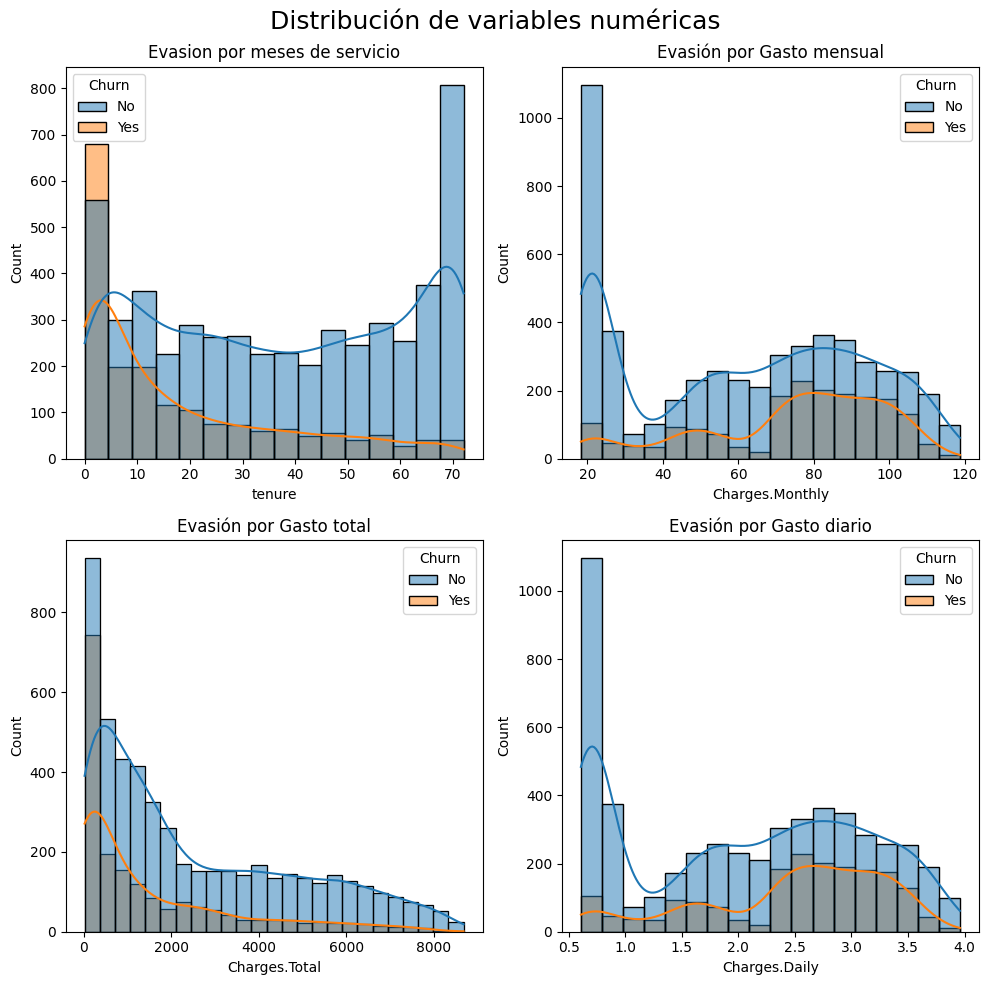

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def distribucion_numerica():

  fig,axs = plt.subplots(2,2,figsize=(10,10))

  fig.suptitle('Distribución de variables numéricas', fontsize= 18)

  sns.histplot(data=datos_telecom,x='tenure',hue='Churn',kde= True, ax=axs[0,0])
  axs[0,0].set_title('Evasion por meses de servicio')

  sns.histplot(data=datos_telecom,x='Charges.Monthly',hue='Churn', kde= True, ax=axs[0,1])
  axs[0,1].set_title('Evasión por Gasto mensual')

  sns.histplot(data=datos_telecom,x='Charges.Total',hue='Churn', kde= True, ax=axs[1,0])
  axs[1,0].set_title('Evasión por Gasto total')

  sns.histplot(data=datos_telecom,x='Charges.Daily',hue='Churn', kde= True, ax=axs[1,1])
  axs[1,1].set_title('Evasión por Gasto diario')

  plt.tight_layout()
  plt.show()

distribucion_numerica()

## 📄Informe final

Este analisis fue realizado ya que la empresa esta enfrentando una alta tasa de cancelaciones de sus servicios y necesita comprender los factores que los han llevado a la pérder de clientes, esto en el mundo empresarial se conoce como "Churn"

Con la ayuda de la bibioteca Pandas en Python, importe la base de datos de la empresa para empezar a analizarla, pero habia un problema; los datos estaban anidados y no podia visualizarlos correctamente, ademas de que habian algunos datos vacios.

### Limpieza y tratamiento de datos
1. Importe el archivo 'Telecomx_Dats.json

2. Normalice las columnas customer,	phone,	internet, y	account con la funcion pd.json_normalize() ya que estaban anidadas y no me permitian visualizar bien los datos. los resultados los guarde en variables

3. Cree una variable con la copia de las columnas que no estaban anidadas en mis datos y con la funcion .merge() las fusione con las columnas que normalice. Como resultado se podian visualizar todos los datos correctamente

4. Cree una funcion para revisar en cada una de las columnas cuantos datos unicos, duplicados y nulos habian, y asi me di cuenta que 'Churn' y 'Charges.Total' que era tipo string y contenia datos vacios, no como null si no como " ". ademas que en la columna 'SeniorCitizen' los datos estaban en booleano (0,1) y por efecto del analisis podria ser confuso

5. use el metodo replace para remplazar el 0 y el 1 por 'No' y 'Yes' en la columna 'SeniorCitizen'

6. en la columna 'Charges.Total'use el metodo pd.to_numeric() con el parametro errors= 'coerce' para convertir los datos en numeros y si hay valores vacios o strings convertirlos en Nan

7. en la columna 'Churn' use el metodo replace para remplazar los espacios vacios con Nan, para despues borrarlos (decidi borrarlos ya que solo conformaban el 3.8% de los datos)

### Analisis Exploratorios de datos

1. para hacer un analisis de los datos numericos use el metodo .decribe() que analiza todos los datos mostrando el minimo, el 25%, el 50%, el 75% el maximo y el promedio de los datos. A continuacion mostrare la tabla:





In [ ]:
datos_telecom_describe

,tenure,Charges.Monthly,Charges.Total,Charges.Daily
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,2.158723
std,24.559481,30.090047,2266.771362,1.003002
min,0.000000,18.250000,18.800000,0.608333
25%,9.000000,35.500000,401.450000,1.183333
50%,29.000000,70.350000,1397.475000,2.345000
75%,55.000000,89.850000,3794.737500,2.995000
max,72.000000,118.750000,8684.800000,3.958333


2. Cree una grafica de pastel para comparar cuantos clientes han abandonado el servicio

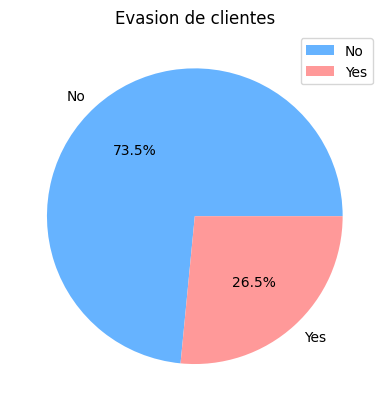

In [ ]:
pie_evasion(datos_telecom)

3. Realice tablas y graficas para comparar las caracteristicas categoricas de los clientes que continuaron con el servicio y los que no.

La primera tabla es de las caracteristicas personales de los clientes, como su genero, si son adultos mayores, si tienen pareja o si tienen dependientes

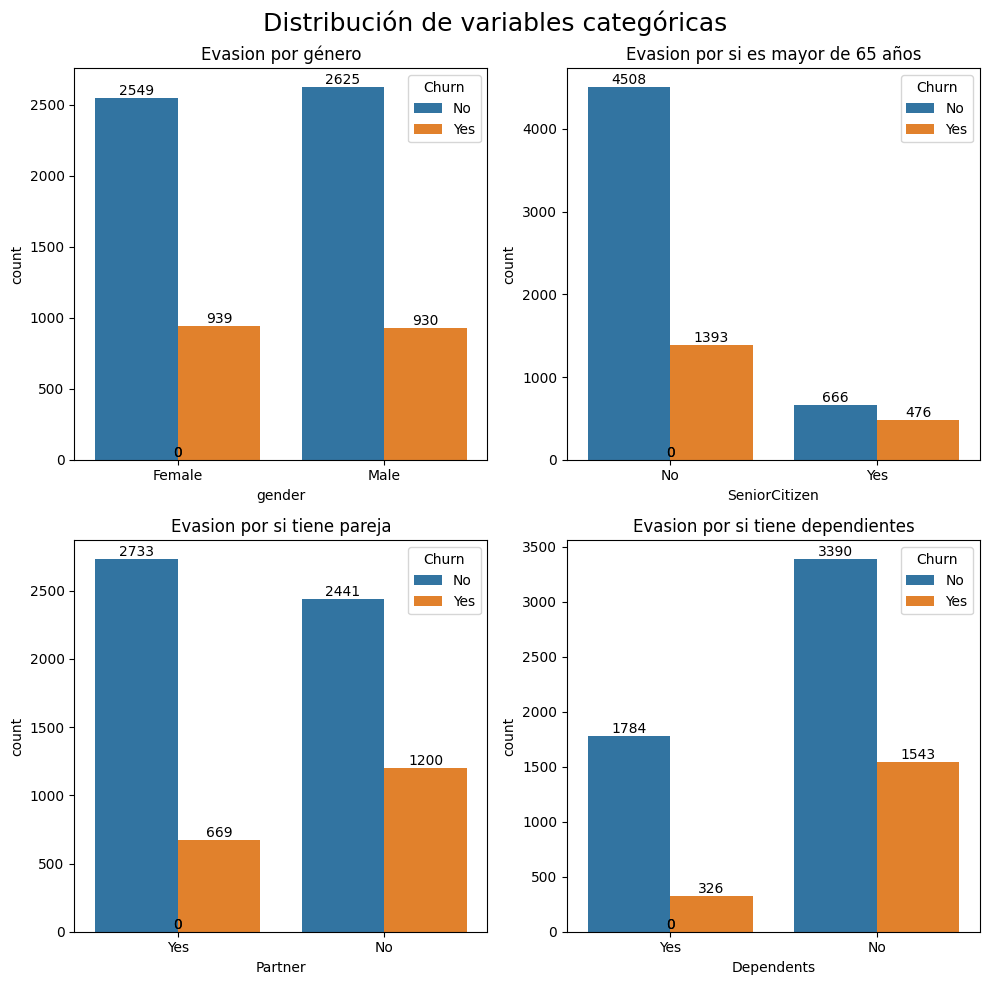

In [ ]:
distribucion_categorica()

En la segunda tabla se encuentran los  servicios y subscripciones que pueden tener los clientes

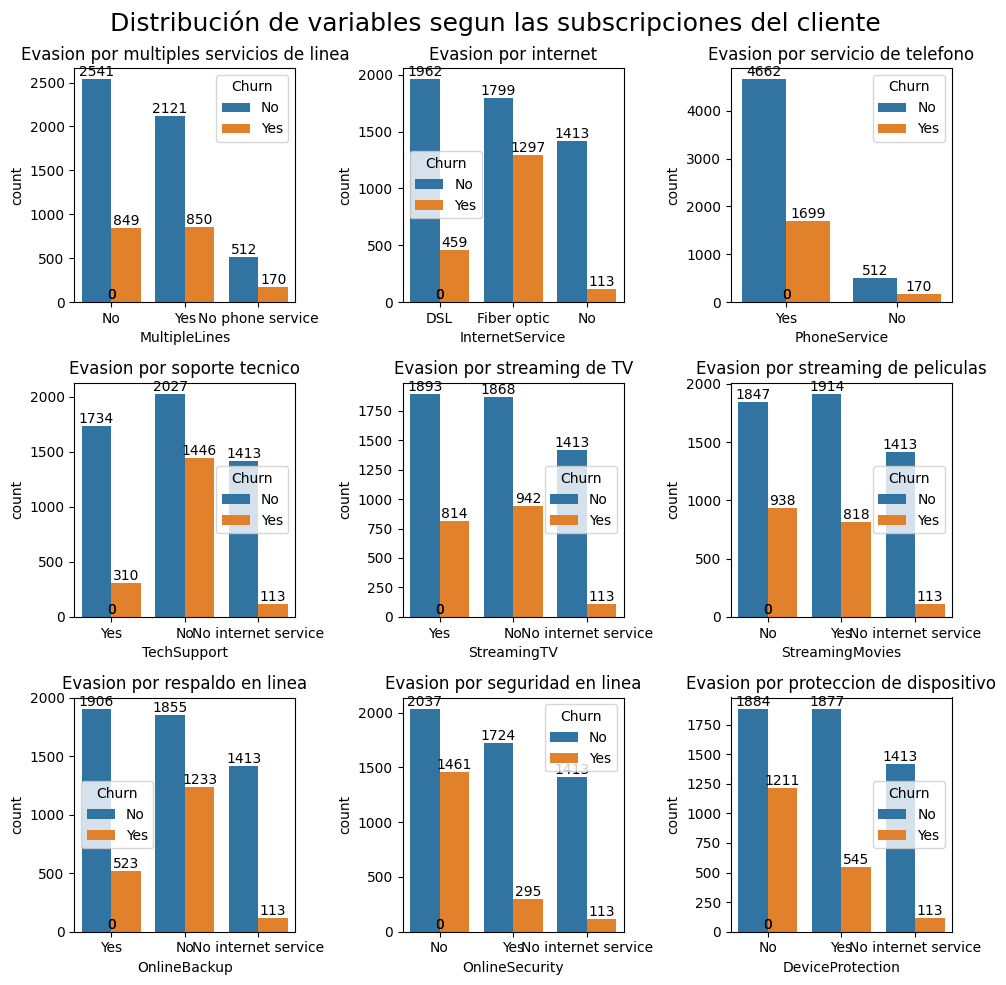

In [ ]:
distribucion_subscripciones()

Y en la tercera tabla de las variables categoricas se encuentra la distribucion de churn por el metodo de pago que tenia cada cliente

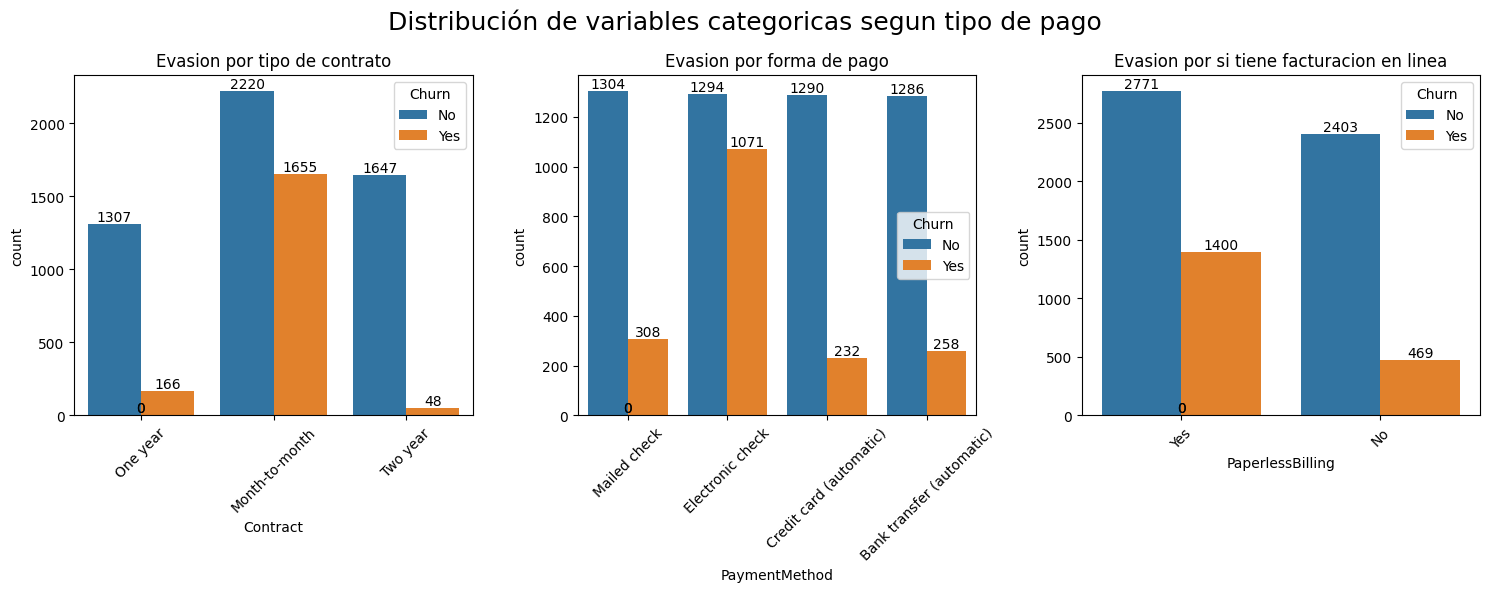

In [ ]:
distribucion_pagos()

4. Como ultimo paso realice una tabla con los graficos de la distribucion de las variables numericas

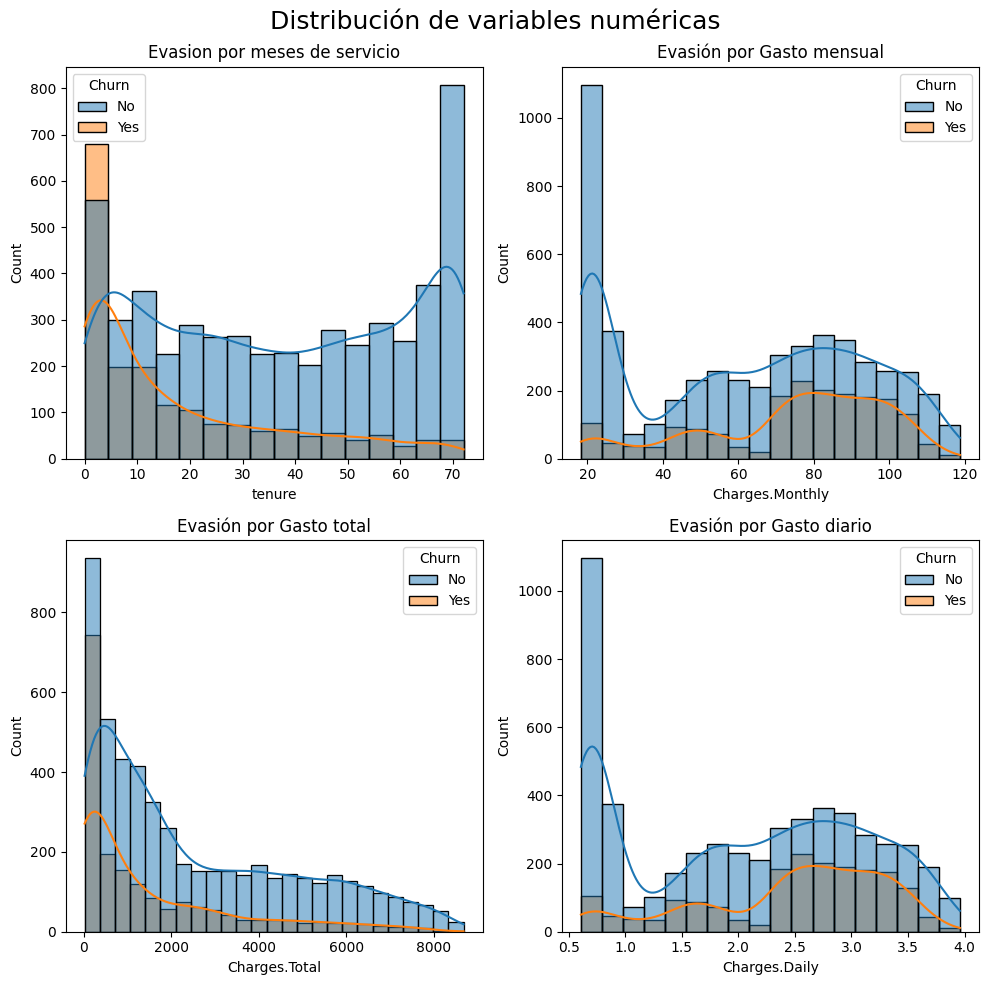

In [ ]:
distribucion_numerica()

### Conclusiones e Insights
Despues de analizar los datos y las graficas llegue a la conclusion de que hay varias razones por las cuales los clientes hacen churn

*  **Evasion por meses de servicio:** Los clientes que llevan menos tiempo con el servico son mas propensos a cancelarlo que los que ya llevan mucho tiempo con este.

* **Evasion por gasto mensual y gasto total:** Los clientes con un mayor cobro mensual y total son mas propensos a cancelar el servicio.

*  **Servicios de internet:** Los clienten que cuentan con servicio de internet de fibra optica son mas propensos a cancelar su servicio que los que cuentan con Internet DSL o no tienen susbripcion a internet.

* **Tipo de contrato:** Los clientes con contratos mensuales son mas propensos a cancelar el servicio que los que tienen un contrato de uno o dos años.

* **Subscripciones adicionales:** Los clientes que no cuentan con subscripciones adicionales como; Seguridad online, Respaldo en linea, Proteccion de dispositivos y Soporte tecnico tienen mas probabilidades de cancelar el servicio.

* **Metodo de pago:** Los clientes que pagan el servicio con cheques electronicos son mas propensos a cancelarlos que los clientes que usan otros metodos de pago.

* **Facturacion en linea** Los clientes que cuentan con una facturacion en linea son mas propensos a cancelar el servicio.

* **Adultos mayores** Los clientes que son adultos mayores tienen mas probabilidad de cancelar el servicio que los que no lo son.

* **Parejas y Dependientes:** Los clientes sin pareja y dependientes parecen mas propensos a cancelar el servicio.

Con estos datos es posible encontrar cuales puntos estan causando el aumento de churn por parte de los clientes

### Recomendaciones y sugerencias

Mi principal recomendacion es considerar explorar más a fondo las características que podrían influir en el aumento de churn, esto puede lograrse con la construcción de un modelo predictivo; Desarrollar un modelo de machine learning para identificar los factores más importantes que contribuyen a la deserción y predecir qué clientes son propensos a cancelar el servicio



In [ ]:
from scipy.special import comb

combinaciones = comb(6, 10)
probabilidad = 1 / combinaciones
print(f'Combinaciones = {combinaciones:.0f} e Probabilidad = {probabilidad:0.15f}')

Combinaciones = 0 e Probabilidad = inf


/tmp/ipython-input-1541800010.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  probabilidad = 1 / combinaciones


In [ ]:
from scipy.stats import binom

p = 0.22
n = 3
k = 2
N = 50

probabilidad = binom.pmf(k, n, p)

media = probabilidad * N

media

np.float64(5.662799999999996)

In [ ]:
media = 20
k= 25

from scipy.stats import poisson

probabilidad = poisson.pmf(k, media)
probabilidad


np.float64(0.04458764910826764)

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

tabla_normal_estandarizada = pd.DataFrame (
    [],
    index = ["{0:0.2f}".format(i / 100) for i in range(0, 400,10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)]
)

for index in tabla_normal_estandarizada.index:
    for column in tabla_normal_estandarizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabla_normal_estandarizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabla_normal_estandarizada.rename_axis('Z', axis = 'columns', inplace = True)

tabla_normal_estandarizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389
